<a href="https://colab.research.google.com/github/NisargBhatt73/Deep-Learning/blob/master/Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [11]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

FETCHING DATASET

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

MIN-MAX NORMALIZATION

In [13]:
X_train = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())

print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(50000, 32, 32, 3)
(50000, 1)
Test
(10000, 32, 32, 3)
(10000, 1)


In [14]:

input_shape = (48, 48, 3)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

MODEL CREATION

In [22]:
for layer in base_model.layers: 
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')

Layer input_6 frozen.
Layer block1_conv1 frozen.
Layer block1_conv2 frozen.
Layer block1_pool frozen.
Layer block2_conv1 frozen.
Layer block2_conv2 frozen.
Layer block2_pool frozen.
Layer block3_conv1 frozen.
Layer block3_conv2 frozen.
Layer block3_conv3 frozen.
Layer block3_pool frozen.
Layer block4_conv1 frozen.
Layer block4_conv2 frozen.
Layer block4_conv3 frozen.
Layer block4_pool frozen.
Layer block5_conv1 frozen.
Layer block5_conv2 frozen.
Layer block5_conv3 frozen.
Layer block5_pool frozen.


TRAINING

In [34]:
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(100, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)     

In [30]:
!pip install livelossplot

TESTING

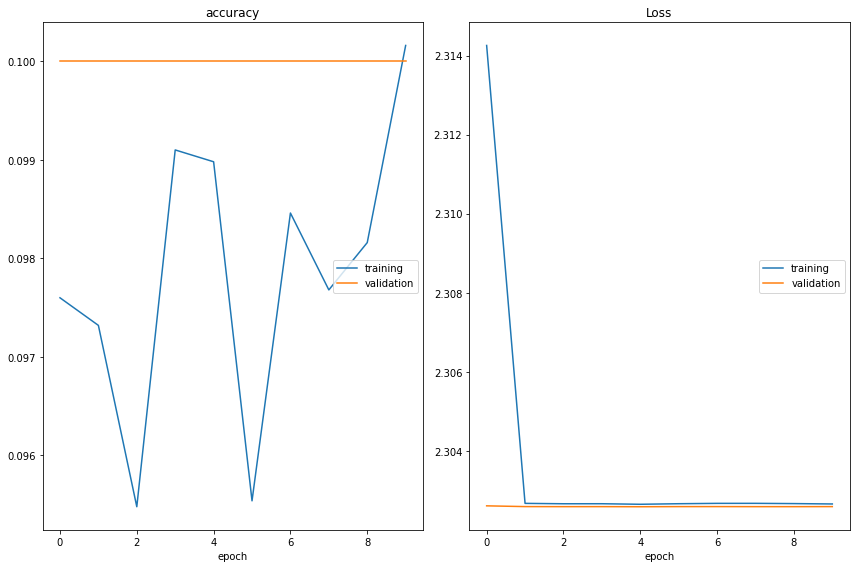

accuracy
	training         	 (min:    0.095, max:    0.100, cur:    0.100)
	validation       	 (min:    0.100, max:    0.100, cur:    0.100)
Loss
	training         	 (min:    2.303, max:    2.314, cur:    2.303)
	validation       	 (min:    2.303, max:    2.303, cur:    2.303)


In [35]:

from livelossplot import PlotLossesKeras

model.fit(X_train_resized, Y_train,
          batch_size=256,
          validation_data=(X_test_resized, Y_test),
          epochs=10,callbacks=[PlotLossesKeras()],verbose = False)

In [36]:
# We evaluate the accuracy and the loss in the test set
scores = model.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 3s 9ms/step - loss: 2.3026 - accuracy: 0.1000
Test loss: 2.3025906085968018
Test accuracy: 0.10000000149011612
